In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
index_csv_1 = 'data_2_9'
index_csv_2 = 'data_9_9'

In [59]:
def read_csv_data(index_csv,location,dropped=True):
    csv_read = pd.read_csv(index_csv+'/'+location+'.csv').dropna()
    if(dropped):
        df_new = csv_read.drop(csv_read[~((csv_read['SSID'] == 'eduroam') | (csv_read['SSID'] == 'Unifi') | (csv_read['SSID'] == 'UnifiGuest'))].index)
        #print('Dropped '+ str(len(csv_read)-len(df_new))+' connections')
    else:
        df_new = csv_read
    df_new = df_new.sort_values('RSSI',ascending=False)
    return df_new

## Graphing RSSI max to min

In [60]:
def plot_df_line(dataframe):
    data = {'Index':[x for x in range(0,len(dataframe))],
            'RSSI': dataframe['RSSI']}
    df_new = pd.DataFrame(data,columns=['Index','RSSI'])
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,7))   
    df_new.plot(ax=axes,x='Index',y='RSSI',kind='line')
    plt.show()
    print('Mean RSSI: '+str(df_new['RSSI'].mean()))
    print('Max  RSSI: '+str(df_new['RSSI'].max()))
    print('Min  RSSI: '+str(df_new['RSSI'].min())+'\n')

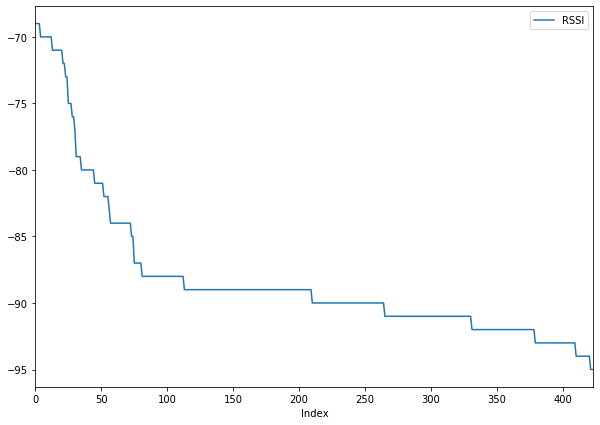

Mean RSSI: -88.13915094339623
Max  RSSI: -69.0
Min  RSSI: -95.0



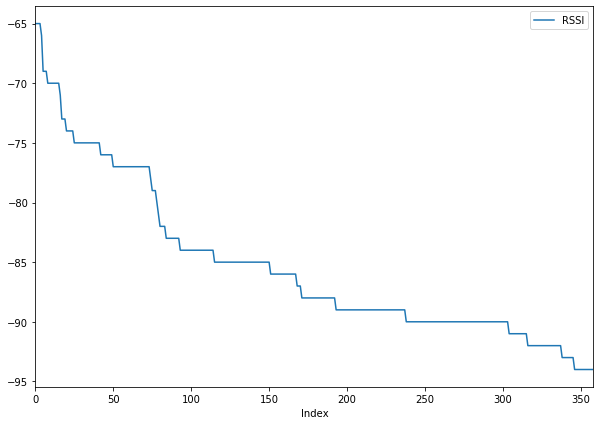

Mean RSSI: -85.3175487465181
Max  RSSI: -65.0
Min  RSSI: -94.0



In [61]:
df_1 = read_csv_data(index_csv_1,'1',dropped=False)
plot_df_line(df_1)
df_2 = read_csv_data(index_csv_2,'1',dropped=False)
plot_df_line(df_2)


LOCATION 1


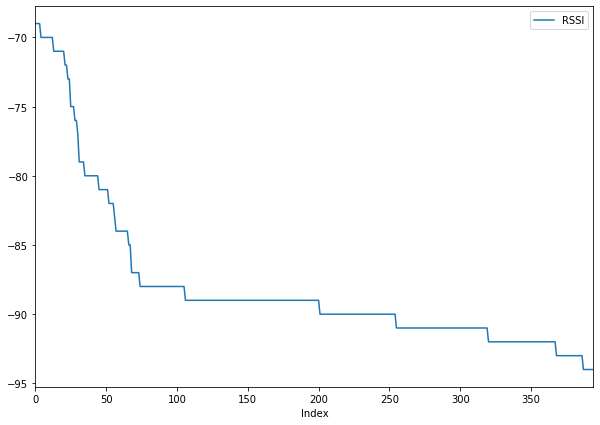

Mean RSSI: -87.95189873417722
Max  RSSI: -69.0
Min  RSSI: -94.0

LOCATION 2


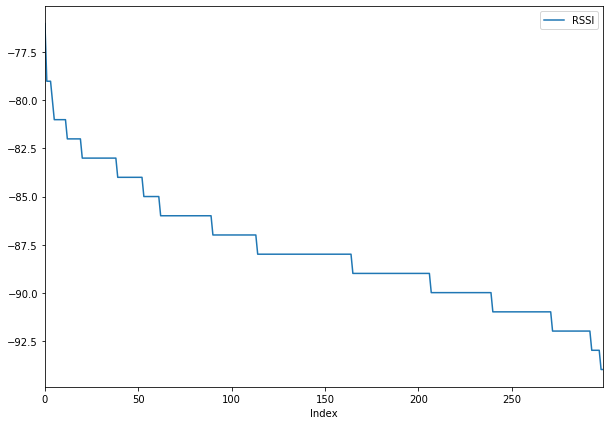

Mean RSSI: -87.74333333333334
Max  RSSI: -76.0
Min  RSSI: -94.0

LOCATION 3


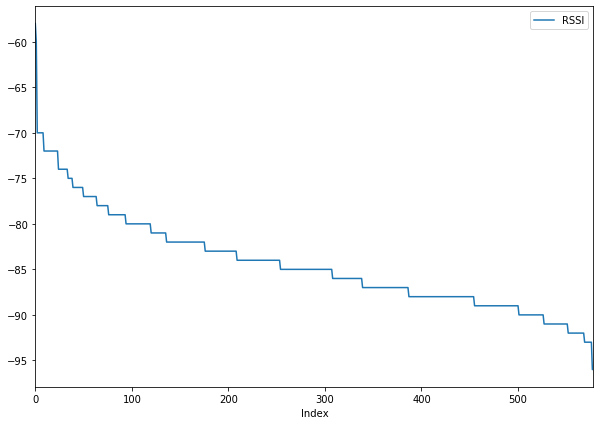

Mean RSSI: -84.41278065630397
Max  RSSI: -58.0
Min  RSSI: -96.0

LOCATION 4


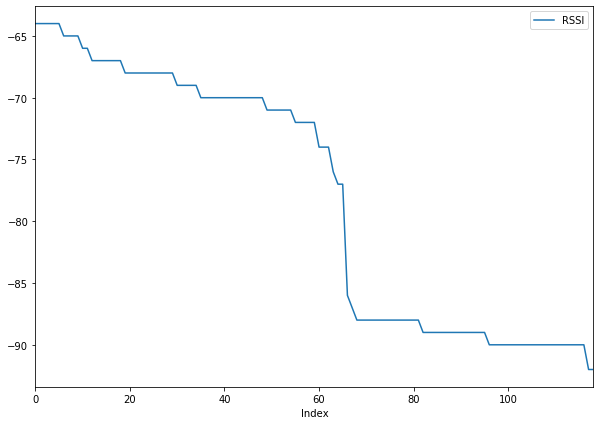

Mean RSSI: -77.99159663865547
Max  RSSI: -64.0
Min  RSSI: -92.0

LOCATION 5


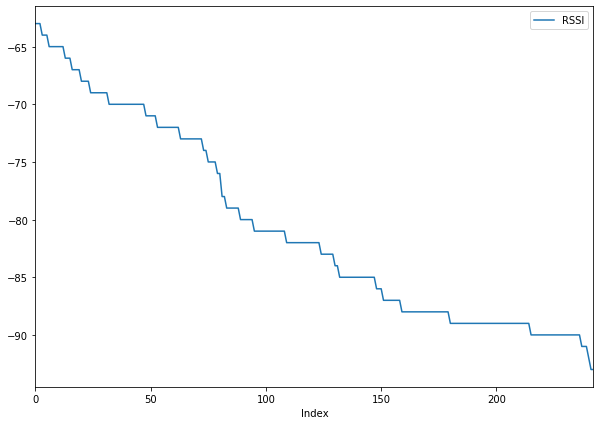

Mean RSSI: -80.65432098765432
Max  RSSI: -63.0
Min  RSSI: -93.0

LOCATION 6


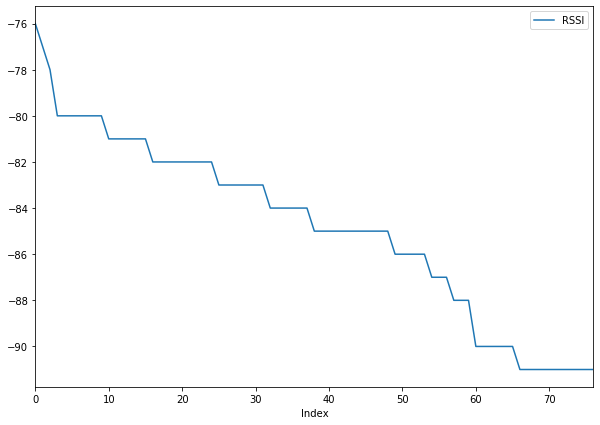

Mean RSSI: -84.81818181818181
Max  RSSI: -76.0
Min  RSSI: -91.0

LOCATION 7


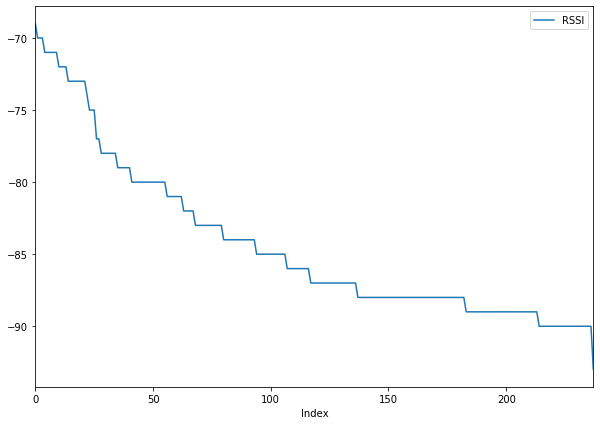

Mean RSSI: -84.34453781512605
Max  RSSI: -69.0
Min  RSSI: -93.0

LOCATION 8


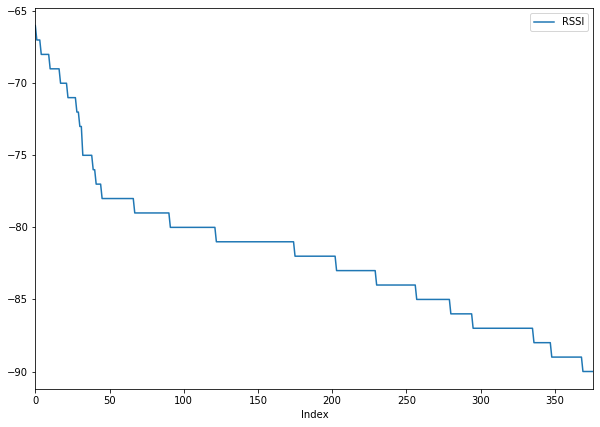

Mean RSSI: -81.84615384615384
Max  RSSI: -66.0
Min  RSSI: -90.0

LOCATION 9


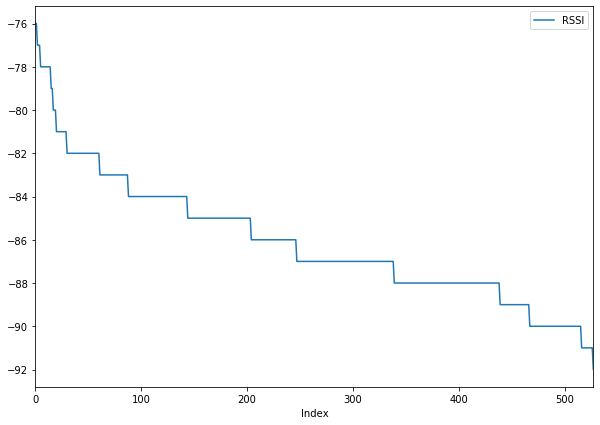

Mean RSSI: -86.08901515151516
Max  RSSI: -76.0
Min  RSSI: -92.0

LOCATION 10


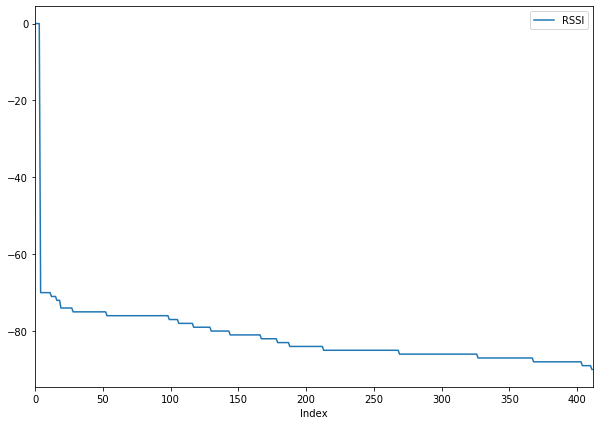

Mean RSSI: -81.40677966101696
Max  RSSI: 0.0
Min  RSSI: -90.0

LOCATION 11


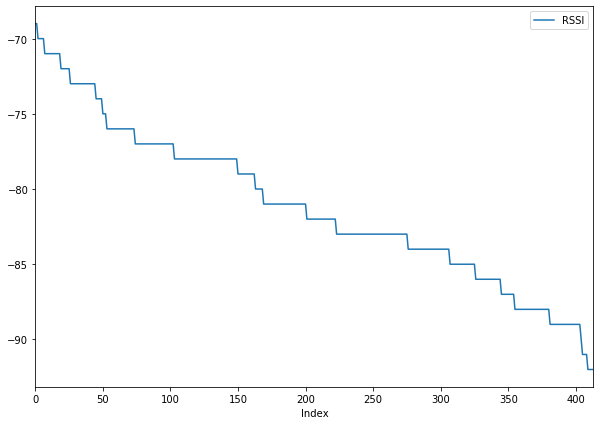

Mean RSSI: -81.14734299516908
Max  RSSI: -69.0
Min  RSSI: -92.0

LOCATION 12


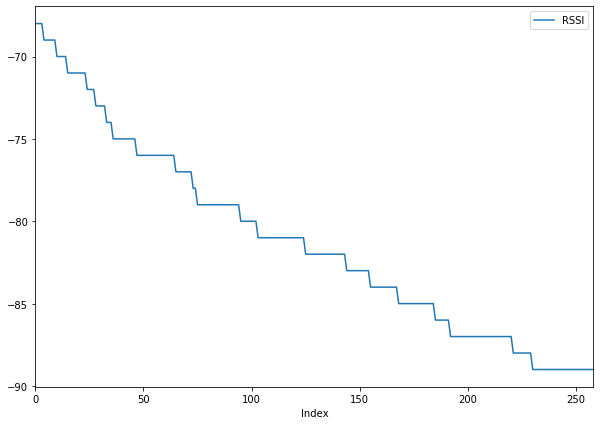

Mean RSSI: -81.16988416988417
Max  RSSI: -68.0
Min  RSSI: -89.0

LOCATION 13


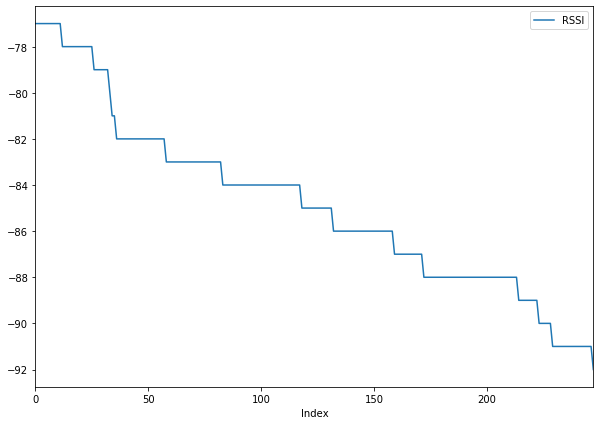

Mean RSSI: -84.83870967741936
Max  RSSI: -77.0
Min  RSSI: -92.0



In [62]:
for ii in range(1,14):
    print('LOCATION '+str(ii))
    df_1 = read_csv_data(index_csv_1,str(ii))
    plot_df_line(df_1)

## Total measurements taken 

In [78]:
def count_total_measurements(csv,isDropped):
    len_df = 0
    for ii in range(1,14):
        df_1 = read_csv_data(csv,str(ii),dropped=isDropped)
        len_df += len(df_1)
    print("Total measurements: "+str(len_df))

In [79]:
count_total_measurements(index_csv_1,False)
count_total_measurements(index_csv_1,True)

Total measurements: 4882
Total measurements: 4190


In [80]:
count_total_measurements(index_csv_2,False)
count_total_measurements(index_csv_2,True)

Total measurements: 4027
Total measurements: 3476


## Channels statistics


In [72]:
unique_df = df_1.groupby('Channel')['SSID'].nunique()
unique_df

Channel
1.0      3
6.0      1
11.0     3
40.0     3
44.0     1
56.0     3
64.0     3
153.0    3
161.0    2
Name: SSID, dtype: int64

In [85]:
unique_df = df_1.groupby('Channel')['SSID'].count()
unique_df

Channel
1.0      51
6.0       3
11.0     66
40.0     28
44.0      1
56.0     24
64.0     48
153.0    21
161.0     6
Name: SSID, dtype: int64

In [100]:
def count_unique(csv):
    for ii in range(1,14):
        df_1 = read_csv_data(csv,str(ii),dropped=True)
        channels_count = df_1.groupby('Channel')['SSID'].count()
        print(channels_count)
        print('Unique channels at location ' +str(ii)+ ': '+str(len(df_1['Channel'].drop_duplicates().unique()))+'\n')

In [101]:
count_unique(index_csv_1)

Channel
1.0      32
6.0      55
11.0     65
36.0     33
40.0     21
48.0     12
60.0     33
64.0     49
153.0     5
157.0    33
161.0    57
Name: SSID, dtype: int64
Unique channels at location 1: 11

Channel
1.0      117
6.0       54
11.0      81
36.0       1
48.0       7
64.0      27
149.0     13
Name: SSID, dtype: int64
Unique channels at location 2: 7

Channel
1.0       98
6.0       82
11.0     116
36.0      48
44.0      24
48.0      29
52.0      24
56.0      24
64.0      66
157.0     24
161.0     44
Name: SSID, dtype: int64
Unique channels at location 3: 11

Channel
1.0      23
11.0     47
153.0    16
161.0    33
Name: SSID, dtype: int64
Unique channels at location 4: 4

Channel
1.0      29
6.0      90
11.0     83
48.0     27
161.0    14
Name: SSID, dtype: int64
Unique channels at location 5: 5

Channel
1.0     27
11.0    39
36.0    11
Name: SSID, dtype: int64
Unique channels at location 6: 3

Channel
1.0      67
6.0      75
36.0     25
149.0    27
153.0    27
161.0    17
Name: SSI